# <center><b> Marketing Campaign 

<p>Marketing campaigns mean anything that required the marketing team to put in work to  promote your product. It could be a new creative direction , a discounted product, targeting a specific demographic or a multitude of other options.</p>
<p>Another common question is how different marketing channels are performing. For example, when you send out an email how many new users subscribe? Given current conversion rates and revenue, should you continue investing in this channel and how much should you spend? Another common practice in marketing is running experiments, or A/B tests, to try to understand the impact of a particular change. All of these types of questions can intersect. You could analyze a marketing campaign by channel based on A/B test results, or you could tackle any one of these types of questions individually.<br>
</p>

<p>My hope is that this project will not only help to reinforce my Python and pandas abilities but also help understand what kinds of problems data analyst on marketing teams might encounter. 


## <b> 1. Exploratory Analysis & Summary Statistics

### <b> 1.1 Import module and file

In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
marketing =  pd.read_csv("..\data\marketing.csv", parse_dates= ['date_served','date_subscribed' , 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


### <b> 1.2 Conversion Rate: </b>
<p> For a marketing team, campaign success is typically measured by conversion rate.  This is to say, of all the people who came into contact with your marketing campaign, how many bought the product? Depending on the business, this could mean that a person made a purchase or subscribed to your service. </p>
<p> Conversion rate is the percentage of people that we market to who ultimately convert to our product. 

  $$\text{{Conversion Rate}} = \frac{{\text{{Number of people who convert }}}}{{\text{{Total number of people we marketed to}}}}$$

In [4]:
subscribers =  marketing[marketing['converted'] == True]['user_id'].nunique()
total =  marketing['user_id'].nunique()
conv_rate = subscribers/total
print(round(conv_rate*100,2),"%")

13.89 %


### <b> 1.3. Retention Rate: </b>
<p> Retention rate is the percentage of people that remain subscribed after a certain period of time. In this course, we will focus on one month retention.

  $$\text{{Retention Rate}} = \frac{{\text{{Number of people who remain subscribed}}}}{{\text{{Total number of people who converted}}}}$$

In [5]:
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()
ret_rate = retained/subscribers
print(round(ret_rate*100,2),'%')

66.8 %


### <b> 1.4. Compare language conversion rate</b>
<p>I want to look at the conversion rate by the language that the marketing asset was shown in. While many of users speak English, some prefer another language. <br>

I can analyze metrics by specific demographics using <code>.groupby()</code>, which allows me to determine whether the marketing campaign was more effective in certain languages.</p>

In [62]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')\
['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


<blockquote><i> You'll notice the conversion rate is much lower for English and Spanish.

<p>The marketing team wants to know whether there is any difference in the conversion rate based on when in the month.

In [ ]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

### <b> 1.5. Visualizing Conversion rate by language</b>

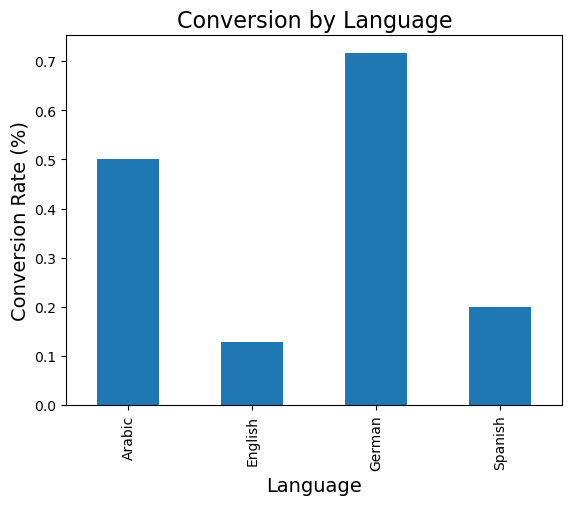

In [89]:
# creating a bar chart
language_conversion_rate.plot(kind = 'bar')
# adding title, x and y-axis label
plt.title('Conversion by Language', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion Rate (%)', size = 14)
# display the plot
plt.show()

<blockquote><i>This plot shows that German and Arabic speakers have much higher conversion rates than English and Spanish speakers. 

### <b> 1.6. Daily Conversion Rate </b>
<p> To understand trends over time, I will create a new DataFrame that includes the conversion rate each day. Essentially, I will follow the same steps as before when I calculated the overall conversion rate, this time also grouping by the date a user subscribed. </p>

<p> Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.</p>

In [97]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

# Before beginning visualizing, I need to transform my data into an easier format to use with pandas and matplotlib.
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

<p>Now that my formatted the data into a more manageable format for visualization, I will proceed to create a line chart. Creating a line plot will make it much easier to notice peaks and valleys in our conversion rate over time as well as any overall trends.

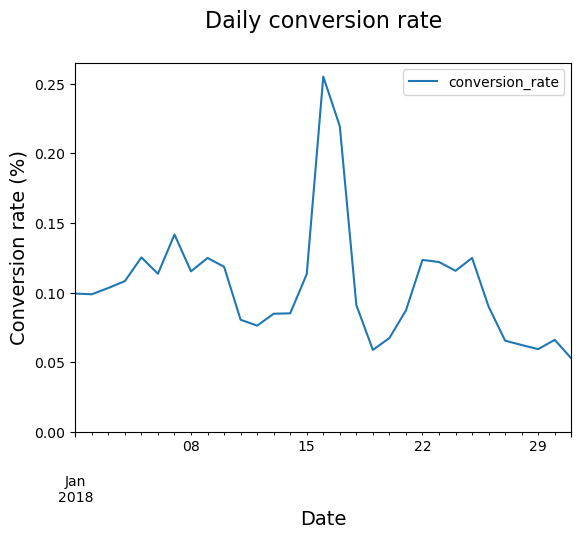

In [96]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

<blockquote><i> As you can see, the conversion rate is relatively steady except for one day in January.

### <b> 1.7 Marketing channels across age groups </b>
<p>Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.<p>

<p> In this part, I will create a grouped bar chart showing how many people each marketing channel reached by age group. </p>

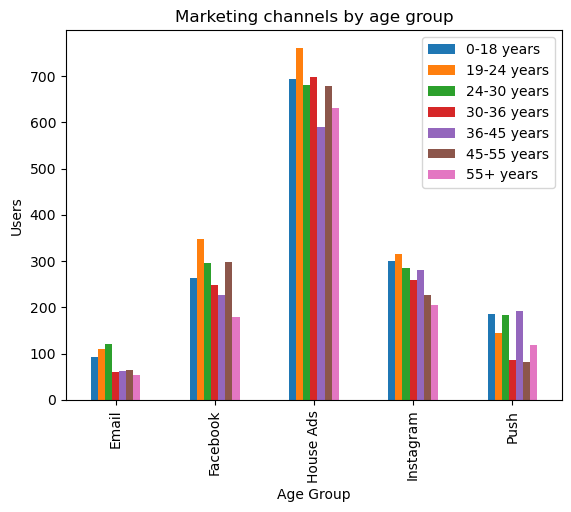

In [98]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
plt.show()

<blockquote><i> In general, we can conclude that email is not reaching older age groups, and Facebook is not reaching many people under 18.

### <b> 1.8. Group by multiple columns </b>
<p>Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. I should first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.</p>

<p>It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.  </p>

In [104]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Calculate the retention rate for each subscription channel
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

print(retention_rate_df)

subscribing_channel     Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                        
2018-01-01           1.000000  0.875000   0.687500   0.750000  1.000000
2018-01-02           0.750000  1.000000   0.588235   0.625000  1.000000
2018-01-03                NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04           0.500000  0.666667   0.466667   0.500000       NaN
2018-01-05           1.000000  0.571429   0.500000   0.636364  1.000000
2018-01-06           0.800000  0.571429   0.941176   0.500000  0.500000
2018-01-07           0.500000  0.750000   0.526316   0.400000  0.666667
2018-01-08                NaN  0.888889   0.500000   0.625000  1.000000
2018-01-09           0.500000  0.285714   0.850000   0.666667  0.500000
2018-01-10           1.000000  0.714286   0.666667   0.555556  1.000000
2018-01-11           0.333333  0.571429   0.166667   1.000000  1.000000
2018-01-12                NaN  0.571429        NaN   0.500000  0

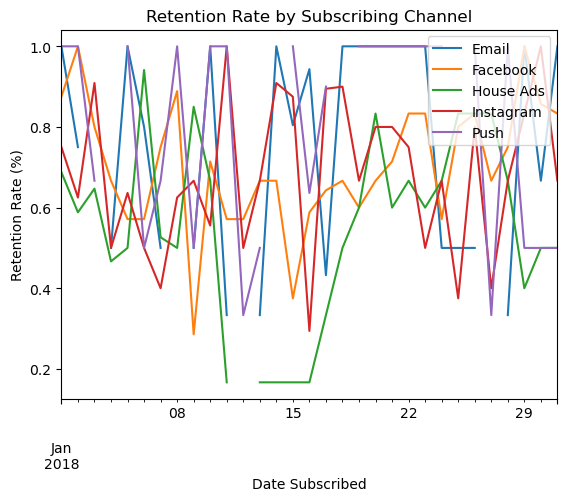

In [103]:
# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', labels = retention_rate_df.columns.values)
plt.show()

<blockquote><i> As you can see, this is a crowded chart that is nearly impossible to read. Therefore, it is hard to conclude anything. I recommend looking at channels one by one to identify trends. This is the reason why the next part is designed.

## <b> 2. Build functions to automate analysis </b> 
<p> In the previous chapter, I may have noticed that i was doing a lot of similar, repetitive tasks. Rather than copypaste the code snippet to make the appropriate edits, which can lead to typos and make it difficult to correct bugs as they arise, it is better to write a function.
<p>In this part, I will build a function that takes a DataFrame and list of column names and outputs the conversion rate across the column(s). </p>

### <b> 2.1 Building a conversion function


In [ ]:
def conversion_rate(dataframe, columns):
    #total number of converted users:
    column_conv = dataframe[dataframe['converted']==True].groupby(columns)['user_id'].nunique()
    #total number of users:
    column_total = dataframe.groupby(columns)['user_id'].nunique()
    #conversion rate
    conversion_rate =  column_conv / column_total
    #fill missing value with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

<p>Now, I will test conversion function made

In [115]:
# Calculate conversion rate by marketing_channel
channel_group_conv = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack and create a DataFrame
channel_group_df = pd.DataFrame(channel_group_conv.unstack(level = 1))

print(channel_group_df)

marketing_channel     Email  Facebook  House Ads  Instagram      Push
date_served                                                          
2018-01-01         1.000000  0.117647   0.084656   0.106667  0.083333
2018-01-02         1.000000  0.098361   0.077982   0.129032  0.055556
2018-01-03         0.000000  0.080645   0.088542   0.171875  0.083333
2018-01-04         0.500000  0.138462   0.089820   0.126984  0.058824
2018-01-05         1.000000  0.112903   0.126582   0.159420  0.027778
2018-01-06         0.600000  0.111111   0.111842   0.095238  0.068966
2018-01-07         1.000000  0.096154   0.145038   0.175439  0.088235
2018-01-08         1.000000  0.136364   0.103896   0.125000  0.064516
2018-01-09         0.500000  0.120690   0.127389   0.152542  0.054054
2018-01-10         0.500000  0.109375   0.124260   0.134328  0.028571
2018-01-11         0.666667  0.120690   0.038710   0.116667  0.085714
2018-01-12         0.500000  0.114754   0.027211   0.142857  0.083333
2018-01-13         1

### <b> 2.2 Plotting function </b>
<p>Similarly,I will aslo build a function to plot the results of my conversion rate function.

In [110]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.figure(figsize=(10,5))
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        plt.ylim(0)
        # Show plot
        plt.show()  
        plt.clf()

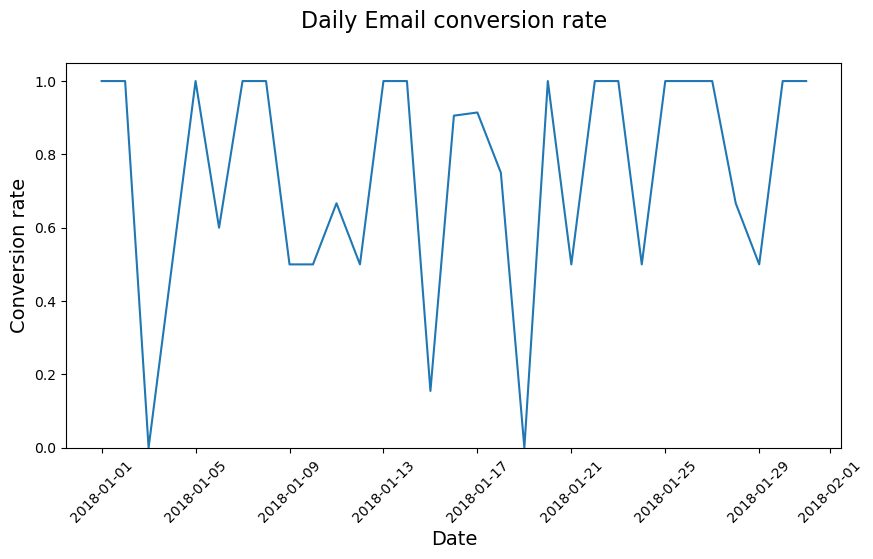

<Figure size 640x480 with 0 Axes>

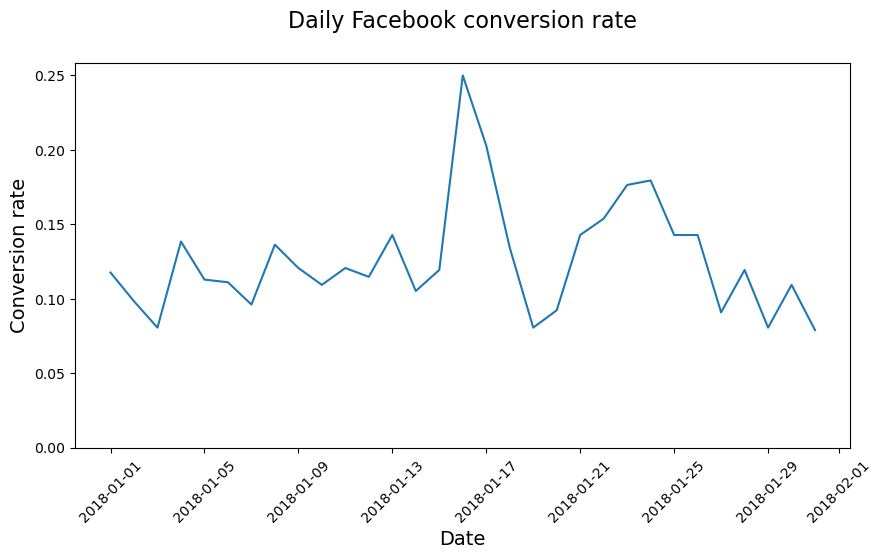

<Figure size 640x480 with 0 Axes>

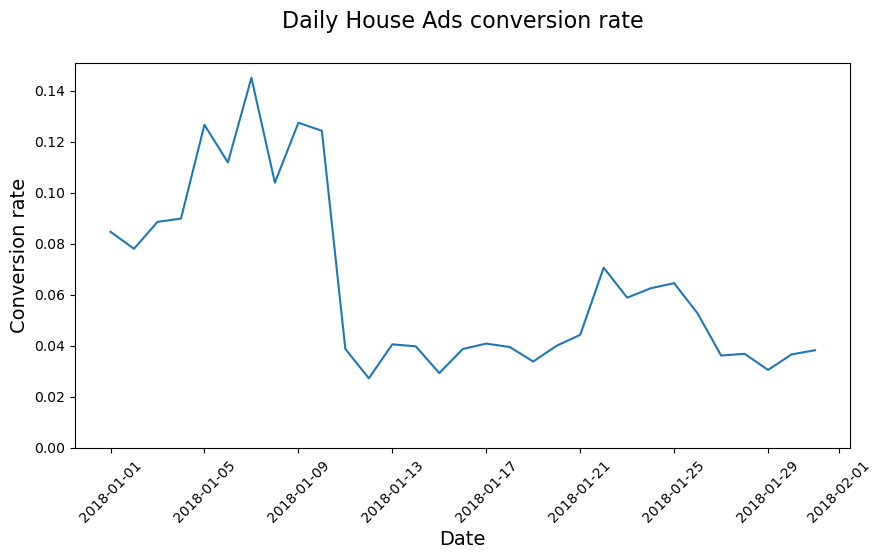

<Figure size 640x480 with 0 Axes>

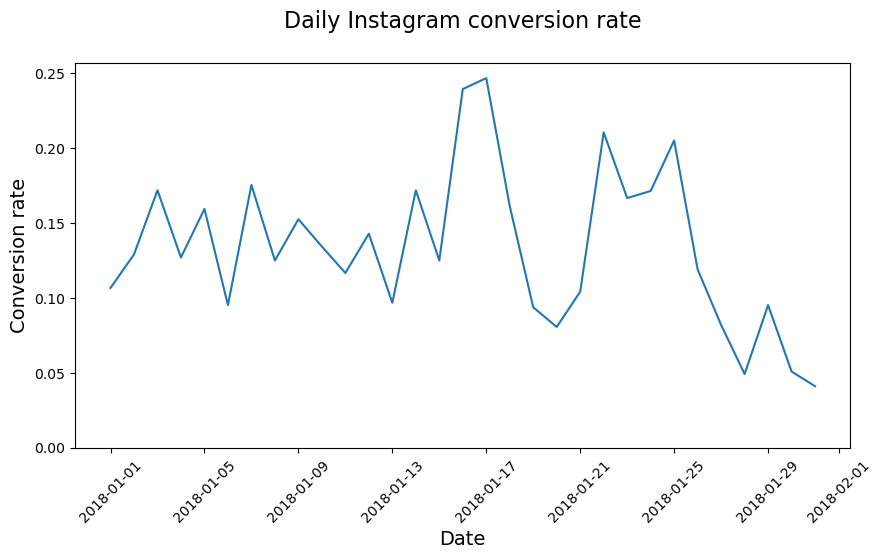

<Figure size 640x480 with 0 Axes>

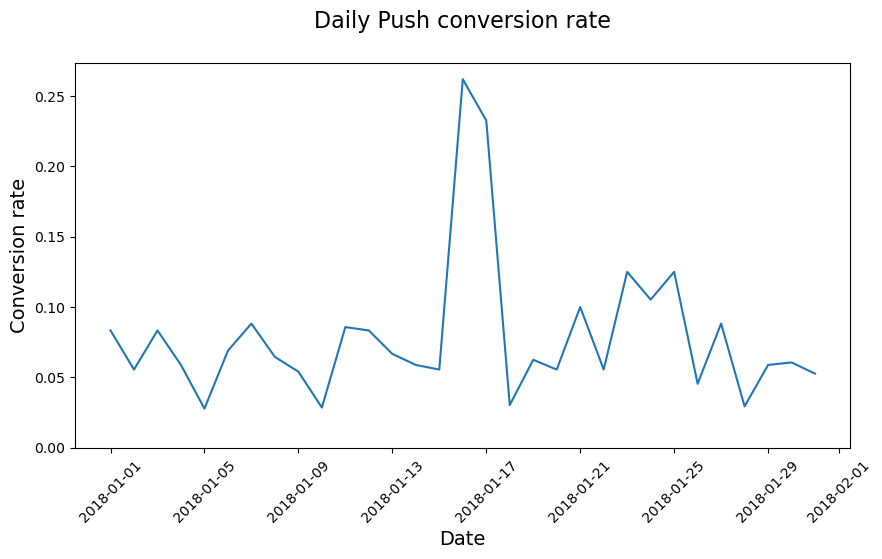

<Figure size 640x480 with 0 Axes>

In [114]:
# test result
plotting_conv(channel_group_df)

### <b> 2.3 Analyzing House ads conversion by language </b>
<p>Now, I want to figure out House Ads conversion rate. And I notice that house ads conversion has been down since January 11, I will try to identify potential causes for the decrease. I will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.</p>

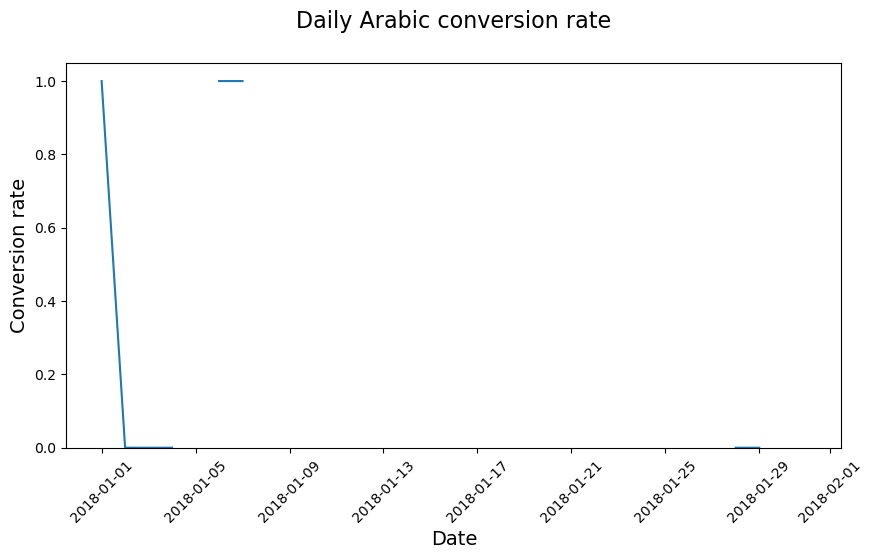

<Figure size 640x480 with 0 Axes>

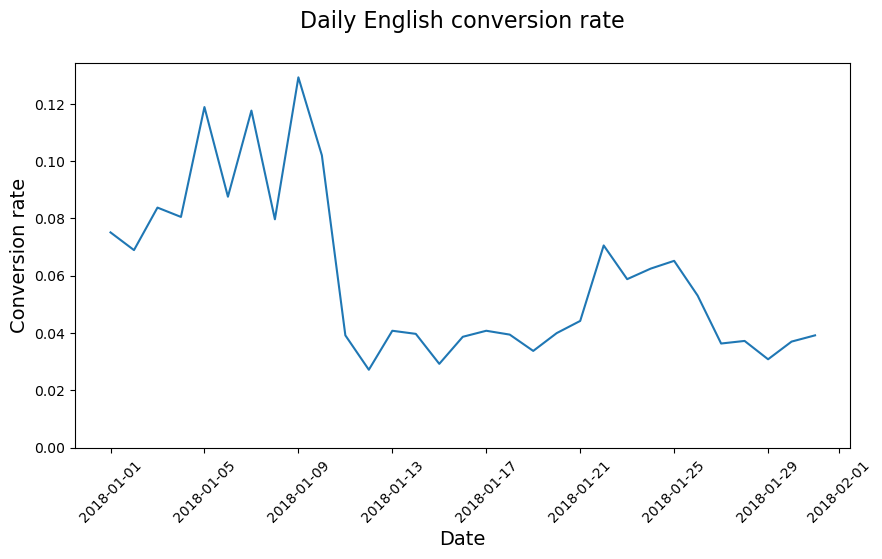

<Figure size 640x480 with 0 Axes>

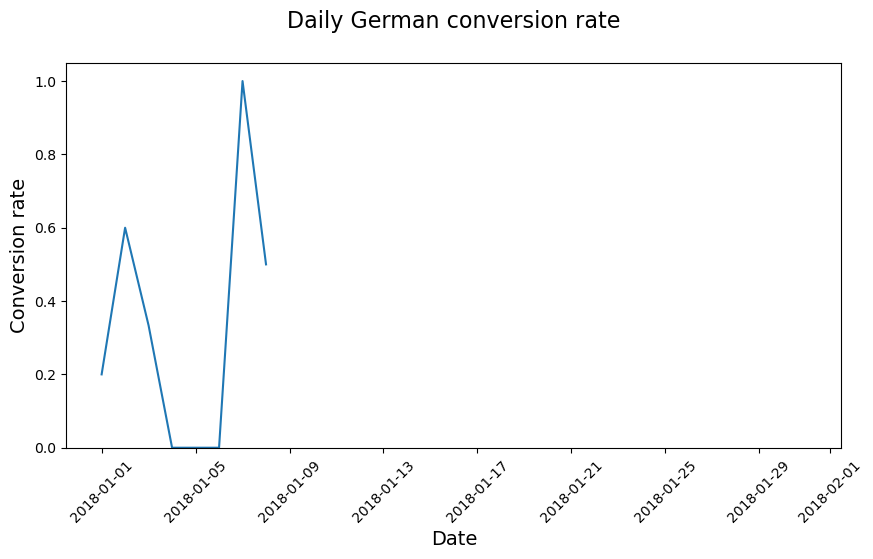

<Figure size 640x480 with 0 Axes>

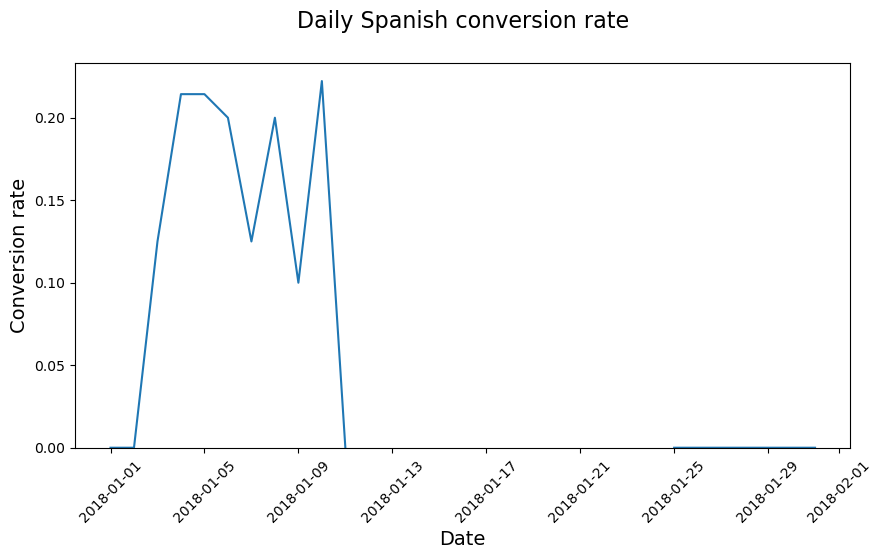

<Figure size 640x480 with 0 Axes>

In [ ]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

<blockquote><i> Interesting. As you can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. I will investigate further.</p>

In [ ]:
# Checks whether users see ads in the correct language
# Use np.where() to create a new column in house_ads called 'is_correct_lang' whose values are 'Yes' if 'language_displayed' is equal to 'language_preferred' and 'No' otherwise.
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['date_served'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Calculate what percentage of users were not being served ads in the right language
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis = 1)

# Print results
print(language_check_df)

is_correct_lang    No    Yes       pct
date_served                           
2018-01-01        2.0  189.0  0.989529
2018-01-02        3.0  247.0  0.988000
2018-01-03        0.0  220.0  1.000000
2018-01-04        0.0  168.0  1.000000
2018-01-05        0.0  160.0  1.000000
2018-01-06        1.0  151.0  0.993421
2018-01-07        2.0  130.0  0.984848
2018-01-08        0.0  154.0  1.000000
2018-01-09        0.0  157.0  1.000000
2018-01-10        0.0  170.0  1.000000
2018-01-11       20.0  135.0  0.870968
2018-01-12       18.0  130.0  0.878378
2018-01-13       26.0  122.0  0.824324
2018-01-14       20.0  131.0  0.867550
2018-01-15       16.0  192.0  0.923077
2018-01-16       28.0  127.0  0.819355
2018-01-17       21.0  127.0  0.858108
2018-01-18       31.0  121.0  0.796053
2018-01-19       22.0  127.0  0.852349
2018-01-20       28.0  124.0  0.815789
2018-01-21       14.0  100.0  0.877193
2018-01-22       13.0   72.0  0.847059
2018-01-23       16.0   69.0  0.811765
2018-01-24       13.0   8

C:\Users\84388\AppData\Local\Temp\ipykernel_36056\764270307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')


<p>Now that I've determined that house ads have been underperforming due to serving all ads in English rather than each user's preferred language and language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug which began on 11th.
<p> Next part, I will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.
</p>

In [ ]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,'language_displayed')

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index =lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


<blockquote> <i>What these indexes mean is that Spanish-speaking users typically convert 1.7 times the rate of English speakers and Arabic and German speakers convert at about 4-5 times the rate compared to English-speakers.</i></blockquote>
<p>To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.<br>

In this step, I will create a new DataFrame that i can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once I have the DataFrame, i can begin calculating how many subscribers i would have expected to have had the language bug not occurred.</p>

In [ ]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred']).agg({'user_id':'nunique','converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))

print(converted_df)

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN     

<p>Now that I've created an index to compare English conversion rates against all other languages, i will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.<br>

An expected conversion DataFrame named <code>converted_df</code> grouping house_ads by date and preferred language. It contains a count of unique users as well as the number of conversions for each language, each day.<br>

For example, I can access the number of Spanish-speaking users who received house ads using <code>converted_df[('user_id','Spanish')]</code>.</p>

In [ ]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11': '2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']*converted_df[('user_id','Spanish')]/100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']*converted_df[('user_id','Arabic')]/100
converted_df['expected_german_conv'] = converted_df['expected_german_rate']*converted_df[('user_id','German')]/100

print(converted_df)

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN     

<blockquote><i> It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. </p>

In [ ]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


<blockquote><i>32 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets.</p>

## <b>3. Personalization A/B Test </b>
<p>The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to the product while the other half contained personalized messaging around the users’ usage of the site. Before I begin analyzing the results, I will check to ensure users were allocated equally to the test and control groups.</p>

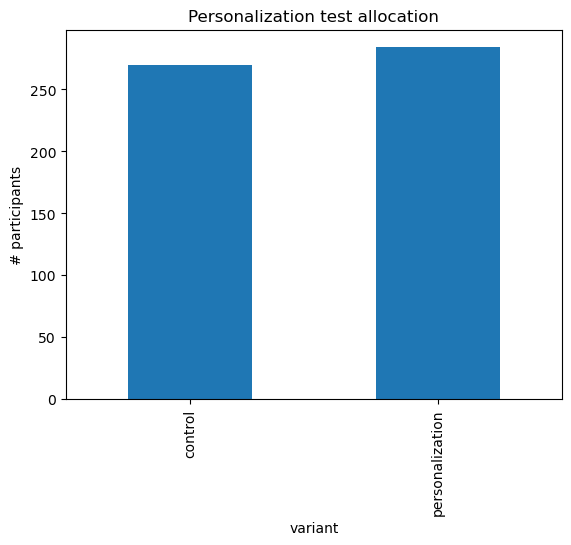

In [ ]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

<blockquote><i> There's a slight difference in allocation, but it's within the expected range so I can continue with my analysis.</blockquote>

### <b> 3.1 Comparing conversion rates</b>

<p>Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test. 

In [ ]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


<blockquote><i> You can see that personalization converted users at a higher rate than the control.

### <b> 3.2 Lift function</b>
<p>Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:</p>

$$\frac{{\text{{Treatment Conversion rate}} - \text{{Control Conversion rate}}}}{{\text{{Control Conversion Rate}}}}$$

<p>The result is the percent difference between the control and treatment.<br>

In this exercise, I will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

In [ ]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


<blockquote><i>As you can see, there's a large lift which means that the personalization variant outperformed the control, but are my results statistically significant? 

### <b>3.3 Statistical significance </b> 
<p>Statistical significance is vital to understanding whether a test showed a positive result by chance or if it is reflective of a true difference between the variants. This will enable your marketing team to make an informed choice about whether to roll out the feature or not.<br>

I will test out the <code>stats.ttest_ind()</code> using control and personalization as the inputs.

In [ ]:
#convert data type to list
control_list = list(control)
personalization_list = list(personalization)
#import stats.ttest_ind() from scipy.stats module
from scipy.stats import ttest_ind
print(stats.ttest_ind(control_list,personalization_list))


Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182)


<blockquote><i> The personalization result are highly statistically significant with p ~ 0.006.

### <b>3.4 An A/B test segmenting function</b>
<p>When running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.<br>

Since I want to segment our data multiple times, I will build a function <code>ab_segmentation()</code> that analyzes the impact of my A/B tests on segments of data that I can reuse each time i want to conduct this kind of analysis.  </p>

In [ ]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control,personalization)) 
      print('t-statistic:', stats.ttest_ind(list(control),list(personalization)), '\n\n')

<p>We will run through two segments in our data that may be relevant to assessing the impact of our test.<br>

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data analyst, it's my responsibility to enable my marketing stakeholders to target users according to their preferences.




In [ ]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




C:\Users\84388\AppData\Local\Temp\ipykernel_36056\1611245096.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('t-statistic:', stats.ttest_ind(list(control),list(personalization)), '\n\n')


<blockquote><i>As you can see, the test performed very well among English and Spanish speakers, while the other language's results are not statistically significant. These are the kinds of differences across groups that are crucial to keep an eye out for.

In [ ]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.185906464414798, pvalue=0.0023238487431765337) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.431790127931851, pvalue=0.017975686009788255) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.0654991273179326, pvalue=0.04306233968820123) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.326565456420339, pvalue=0.0016358623456360468) 




<blockquote><i>You found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.

## <b>4. Wrap-up

<ol>
<li> In this project, I analyzed a marketing campaign from start to finish. I began with importing the dataset and used the head(), info(), and describe() methods to assess the contents and quality of the dataset. 
<li> Next, I practiced feature engineering by creating a new columns and corrected an errors in the data. 
<li> Then I looked at high-level metrics like conversion and retention rates. 
<li> After I had a handle on the marketing metrics, I practiced user segmentation. For example, looking at how different marketing channels reach different age groups. 
<li> Next, I dealt with one of the most common challenges in marketing. Something went wrong in the campaign, and it was my job to identify the problem and assess the impact of the mistake. I successfully found the cause, which was a language mismatch. 
<li> Finally, I analyzed an A/B test. I figured out how to determine statistical significance and the importance of segmentation in A/B tests to understand the true impact of the change. I found that while the test was a success overall, personalization was not appreciated in certain regions and by certain age groups. 
</ol>